## Perceptrón Usando scikit-learn

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# en esta ocasión importaremos el dataset desde la biblioteca scikit-learn:
# https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection
from sklearn import datasets
from sklearn import model_selection

iris = datasets.load_iris()

#Extraemos la primera y tercera columna del dataset como características de entrada
# columna 0 : longitud de sépalo, columna 2 : longitud de pétalo
X = iris.data[:, [2, 3]]
y = iris.target

print('Class labels:', np.unique(y))

# np.unique devuelve las únicas 3 etiquetas de clase en iris.target Iris-setosa, Iris-versicolor, Iris-virginica

Class labels: [0 1 2]


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=1,  stratify = y)

#Comprobamos el resultado de stratify = y
print('Número de etiquetas en y: ', np.bincount(y))
    
print('Número de etiquetas en y_train: ', np.bincount(y_train))

print('Número de etiquetas en y_test: ', np.bincount(y_test))

Número de etiquetas en y:  [50 50 50]
Número de etiquetas en y_train:  [35 35 35]
Número de etiquetas en y_test:  [15 15 15]


In [4]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)                     # Estima los parámetros de media y desvío
X_train_std = sc.transform(X_train) # Normaliza los datos usando las estimaciones
X_test_std = sc.transform(X_test)   # Se utilizan los mismos parámetros para
                                    # los datos de entrenamiento y de prueba

In [5]:
# Entrenamiento
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

ppn = Perceptron(max_iter=25, eta0=0.1, random_state=1, shuffle=True)
ppn.fit(X_train_std, y_train)

# Usamos random_state = 1 para asegurar la reproducibilidad del shuffling inicial 
# del dataset en cada época al inicio del entrenamiento

Perceptron(eta0=0.1, max_iter=25, random_state=1)

In [6]:
# Atributos de la clase perceptron
print(f"clases: {ppn.classes_}")

print(f"vector de pesos: {ppn.coef_}")


clases: [0 1 2]
vector de pesos: [[-0.10655204 -0.11836728]
 [ 0.31790327 -0.3670884 ]
 [ 0.36018414  0.30003858]]


In [7]:
# Predicción    
y_pred = ppn.predict(X_test_std)
mal_clasificadas = (y_test != y_pred).sum()
print(f'Muestras mal clasificadas: {mal_clasificadas}/{len(X_test_std)}')
error = (mal_clasificadas)/len(X_test_std)
print(f'Error de clasificación: {error:.2f}')

Muestras mal clasificadas: 1/45
Error de clasificación: 0.02


In [8]:
# Cálculo de la precisión
accuracy_pred = (1 - error)
print(f'Precisión: {accuracy_pred:.2f}')

Precisión: 0.98


In [9]:
# usando métricas de scikit-learn
from sklearn.metrics import accuracy_score
accuracy_pred = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy_pred:.2f}')

Accuracy: 0.98


In [10]:
# Predicción y cálculo de la precisión
accuracy_pred = ppn.score(X_test_std, y_test) # combina la predicción con el cálculo de la precisión
print(f'Precisión de clasificación: {accuracy_pred:.2f}')

Precisión de clasificación: 0.98


In [16]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, clasificador, test_idx=None, resolution=0.02):
    
    # setup marker generator and color map
    markers = ('s', 'o', '^', 'v', 'x')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    Z = clasificador.predict(np.array([xx1.ravel(), xx2.ravel()]).T)

    Z = Z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c="None",
                    edgecolor='black',
                    alpha=1,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

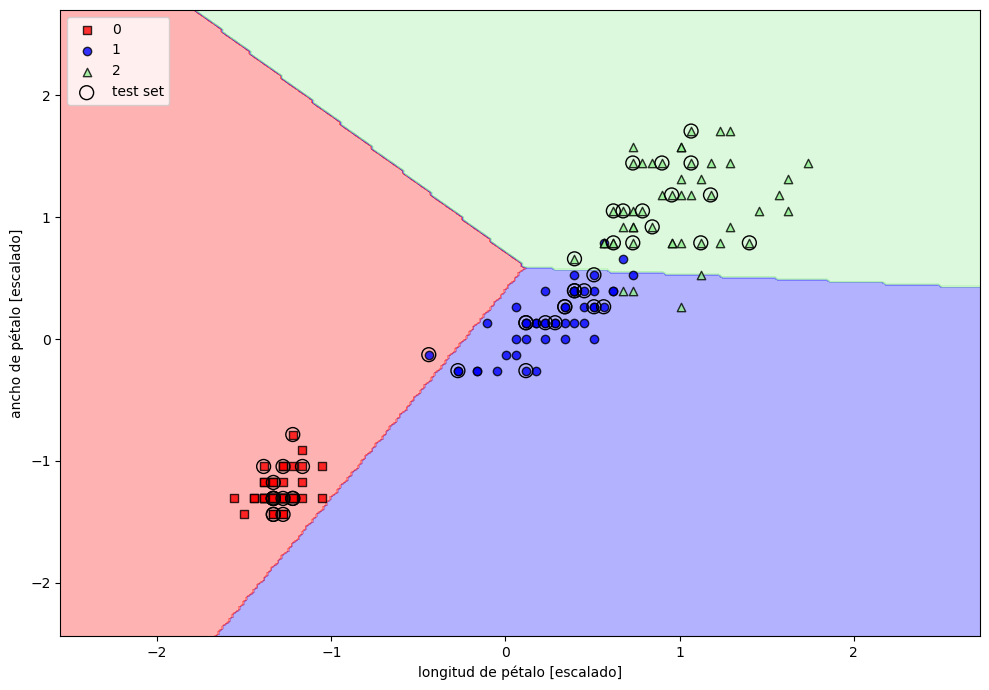

In [17]:

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plt.figure(figsize=(10,7))
plot_decision_regions( X=X_combined_std, y=y_combined, clasificador=ppn, test_idx=range(105, 150))
plt.xlabel('longitud de pétalo [escalado]')
plt.ylabel('ancho de pétalo [escalado]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Actividad Semana6

Usando el dataset de Diabetes compare los 3 clasificadores vistos hasta ahora: KNN, SVM y PS. Pruebe distintas configuraciones para cada clasificador y seleccione la de mejor desempeño usando [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html). Haga una tabla comparativa con los resultados. Utilice como medida de desempeño la tasa de aciertos o Accuracy.